In [1]:
# Import required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy as db
from dotenv import load_dotenv

In [2]:
# Load the data from the .env file for the project
# Download and install python-dotenv library; use "pip install python-dotenv"
# Also need to include the .env file in the root folder and add it to the 
# This .env file has the values for connecting to the Postgres DB server.
# This methods prevents any hardcoded id and password in the code.


load_dotenv(".env")

# Get the Postgres related details
db_driver = os.environ.get('DB_DRIVER')
postgres_server = os.environ.get('POSTGRES_SERVER')
postgres_server_port = os.environ.get('POSTGRES_SERVER_PORT')
postgres_db = os.environ.get('POSTGRES_DB')
postgres_user = os.environ.get('POSTGRES_USER')
postgres_pwd = os.environ.get('POSTGRES_PWD')

In [3]:
# Create a connection to the Postgres database engine
#connection_string = 'postgresql://<user>:<pwd>@<host>:<port>/<database>'
connection_string = f'{db_driver}://{postgres_user}:{postgres_pwd}@{postgres_server}:{postgres_server_port}/{postgres_db}'
engine = db.create_engine(connection_string)
connection = engine.connect()

In [4]:
# Execute the query against the Postgres DB using the "connection"
# SQL query to get the salary of all the employees from the employee_db in Postgres
query = 'select e.emp_no as "Employee Number" \
               ,e.last_name as "Last Name" \
               ,e.first_name as "First Name" \
               ,e.sex as "Gender" \
               ,s.salary as "Salary" \
           from public.employee as e \
                left join public.salary as s on (e.emp_no = s.emp_no) \
       order by e.emp_no;'

ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()

# Display first 5 records
ResultSet[:5]

[(10001, 'Facello', 'Georgi', 'M', 60117),
 (10002, 'Simmel', 'Bezalel', 'F', 65828),
 (10003, 'Bamford', 'Parto', 'M', 40006),
 (10004, 'Koblick', 'Chirstian', 'M', 40054),
 (10005, 'Maliniak', 'Kyoichi', 'M', 78228)]

In [5]:
#Create a Pandas DataFrame to analyze the Salary data
salary_df = pd.DataFrame(ResultSet)
salary_df.columns = ['Employee Number','Last Name','First Name','Gender','Salary']
salary_df.head()

,Employee Number,Last Name,First Name,Gender,Salary
0,10001,Facello,Georgi,M,60117
1,10002,Simmel,Bezalel,F,65828
2,10003,Bamford,Parto,M,40006
3,10004,Koblick,Chirstian,M,40054
4,10005,Maliniak,Kyoichi,M,78228


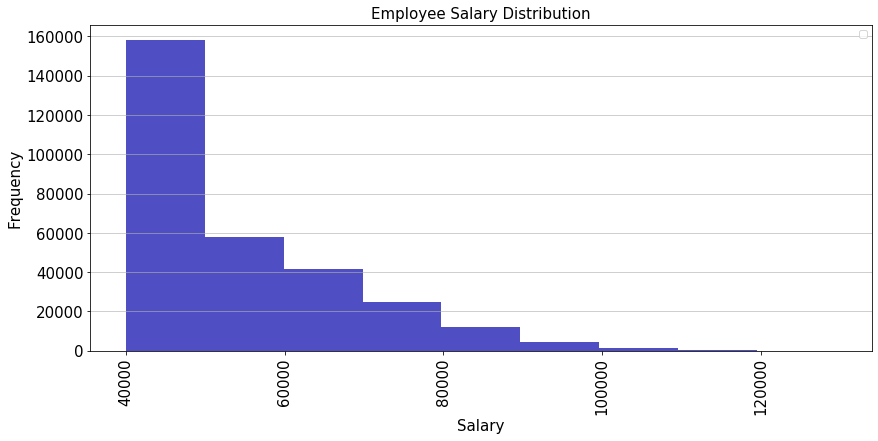

In [6]:
# Plot the histogram for the Employee Salary.

salary_list = salary_df['Salary']

# Create 10 bins for the histogram
bins = np.linspace(salary_list.min(), salary_list.max(), 10)

plt.figure(figsize=[14,6])
plt.title('Employee Salary Distribution', fontsize=15)
plt.xlabel('Salary', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.legend(['Salary'], loc='best')

# Plot the Histogram
n, bins, patches = plt.hist(x=salary_list, bins=bins, color='#0504aa', alpha=0.7, rwidth=1.0)

plt.savefig('./output_data/fig01-employee-salary.png', format='png', bbox_inches='tight', dpi=300)  

In [7]:
# Get the data to plot the "Employee Average Salary by Title"
# Execute the query against the Postgres DB using the "connection"
# SQL query to get the "Employee Average Salary by Title" from the "employee_db" in Postgres
# The query uses left outer join though it is not required as all the employees have a correspoding
# record in the other 2 tables by the left join.

query = 'select t.title as "Title" \
               ,cast(round(avg(s.salary), 0) as integer) as "Avg Salary" \
           from public.employee as e \
                left join public.salary as s on (e.emp_no = s.emp_no) \
                left join public.title as t on (e.emp_title_id = t.title_id) \
       group by t.title \
       order by t.title;'

ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()

# Display all the data retrieved
ResultSet[:]

[('Assistant Engineer', 48564),
 ('Engineer', 48535),
 ('Manager', 51531),
 ('Senior Engineer', 48507),
 ('Senior Staff', 58550),
 ('Staff', 58465),
 ('Technique Leader', 48583)]

In [8]:
#Create a Pandas DataFrame to analyze the salary data
title_avg_salary_df = pd.DataFrame(ResultSet)
title_avg_salary_df.columns = ['Title','Avg Salary']
title_avg_salary_df

,Title,Avg Salary
0,Assistant Engineer,48564
1,Engineer,48535
2,Manager,51531
3,Senior Engineer,48507
4,Senior Staff,58550
5,Staff,58465
6,Technique Leader,48583


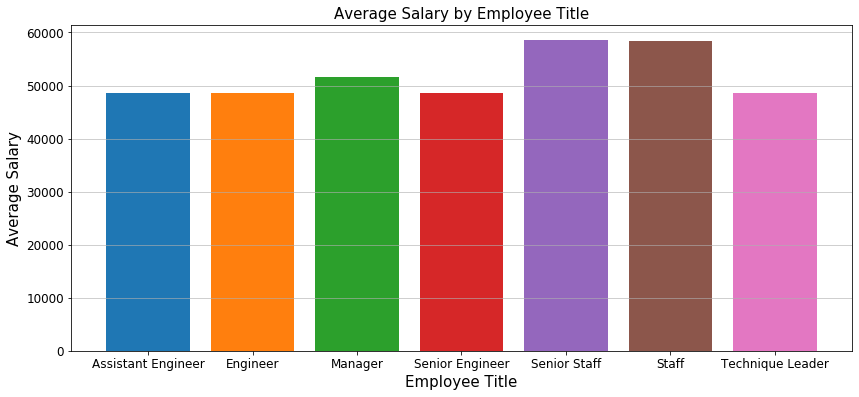

In [9]:
plt.figure(figsize=[14,6])
plt.title('Average Salary by Employee Title', fontsize=15)
plt.xlabel('Employee Title', fontsize=15)
plt.ylabel('Average Salary', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

x_axis = title_avg_salary_df['Title']
y_axis = title_avg_salary_df['Avg Salary']

# Number of bars
N = len(title_avg_salary_df)
map_df = pd.Series(np.random.randint(10, 50, N), index=np.arange(1, N+1))
cmap = plt.cm.tab10
colors = cmap(np.arange(len(map_df)) % cmap.N)
                  
plt.bar(x_axis, y_axis, color=colors)
plt.grid(axis='y', alpha=0.75)

plt.savefig('./output_data/fig02-avg-salary-by-title.png', format='png', bbox_inches='tight', dpi=300)